<a href="https://colab.research.google.com/github/josecumbe/Phising-Website-Classification-Model/blob/main/Phising_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
import pickle # to save model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Get Data from Kaggle

In [ ]:
# Connecting to Kaggle API
files.upload()  #this will prompt you to upload the kaggle.json

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [ ]:
!cd '/content/drive/MyDrive/School [ALU]/Computer Science/Y_4/TERM2/Data Mining/Summative'

In [ ]:
# Downloading the required dataset
!kaggle datasets download -d eswarchandt/phishing-website-detector

  0% 0.00/197k [00:00<?, ?B/s]
100% 197k/197k [00:00<00:00, 70.9MB/s]


In [ ]:
!unzip -q 'phishing-website-detector.zip' -d '/content/drive/MyDrive/School [ALU]/Computer Science/Y_4/TERM2/Data Mining/Summative'

# EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/School [ALU]/Computer Science/Y_4/TERM2/Data Mining/Summative/phishing.csv')

In [ ]:
df.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


The class label states if a website is phising or not (1 or -1).

In [ ]:
df.shape

(11054, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [ ]:
# check if there are missing data
df.isnull().values.any()

False

In [ ]:
df.describe()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
count,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,...,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000
mean,5526.500000,0.313914,-0.633345,0.738737,0.700561,0.741632,-0.734938,0.064049,0.251040,-0.336711,...,0.613353,0.816899,0.061335,0.377239,0.287407,-0.483626,0.721549,0.343948,0.719739,0.113986
std,3191.159272,0.949495,0.765973,0.674024,0.713625,0.670837,0.678165,0.817492,0.911856,0.941651,...,0.789845,0.576807,0.998162,0.926158,0.827680,0.875314,0.692395,0.569936,0.694276,0.993527
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2763.250000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5526.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8289.750000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11053.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# check number of phising and not phising websites in df
# 1 for phising website and -1 for not phising website
df['class'].value_counts()

 1    6157
-1    4897
Name: class, dtype: int64

# DATA PREPARATION

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

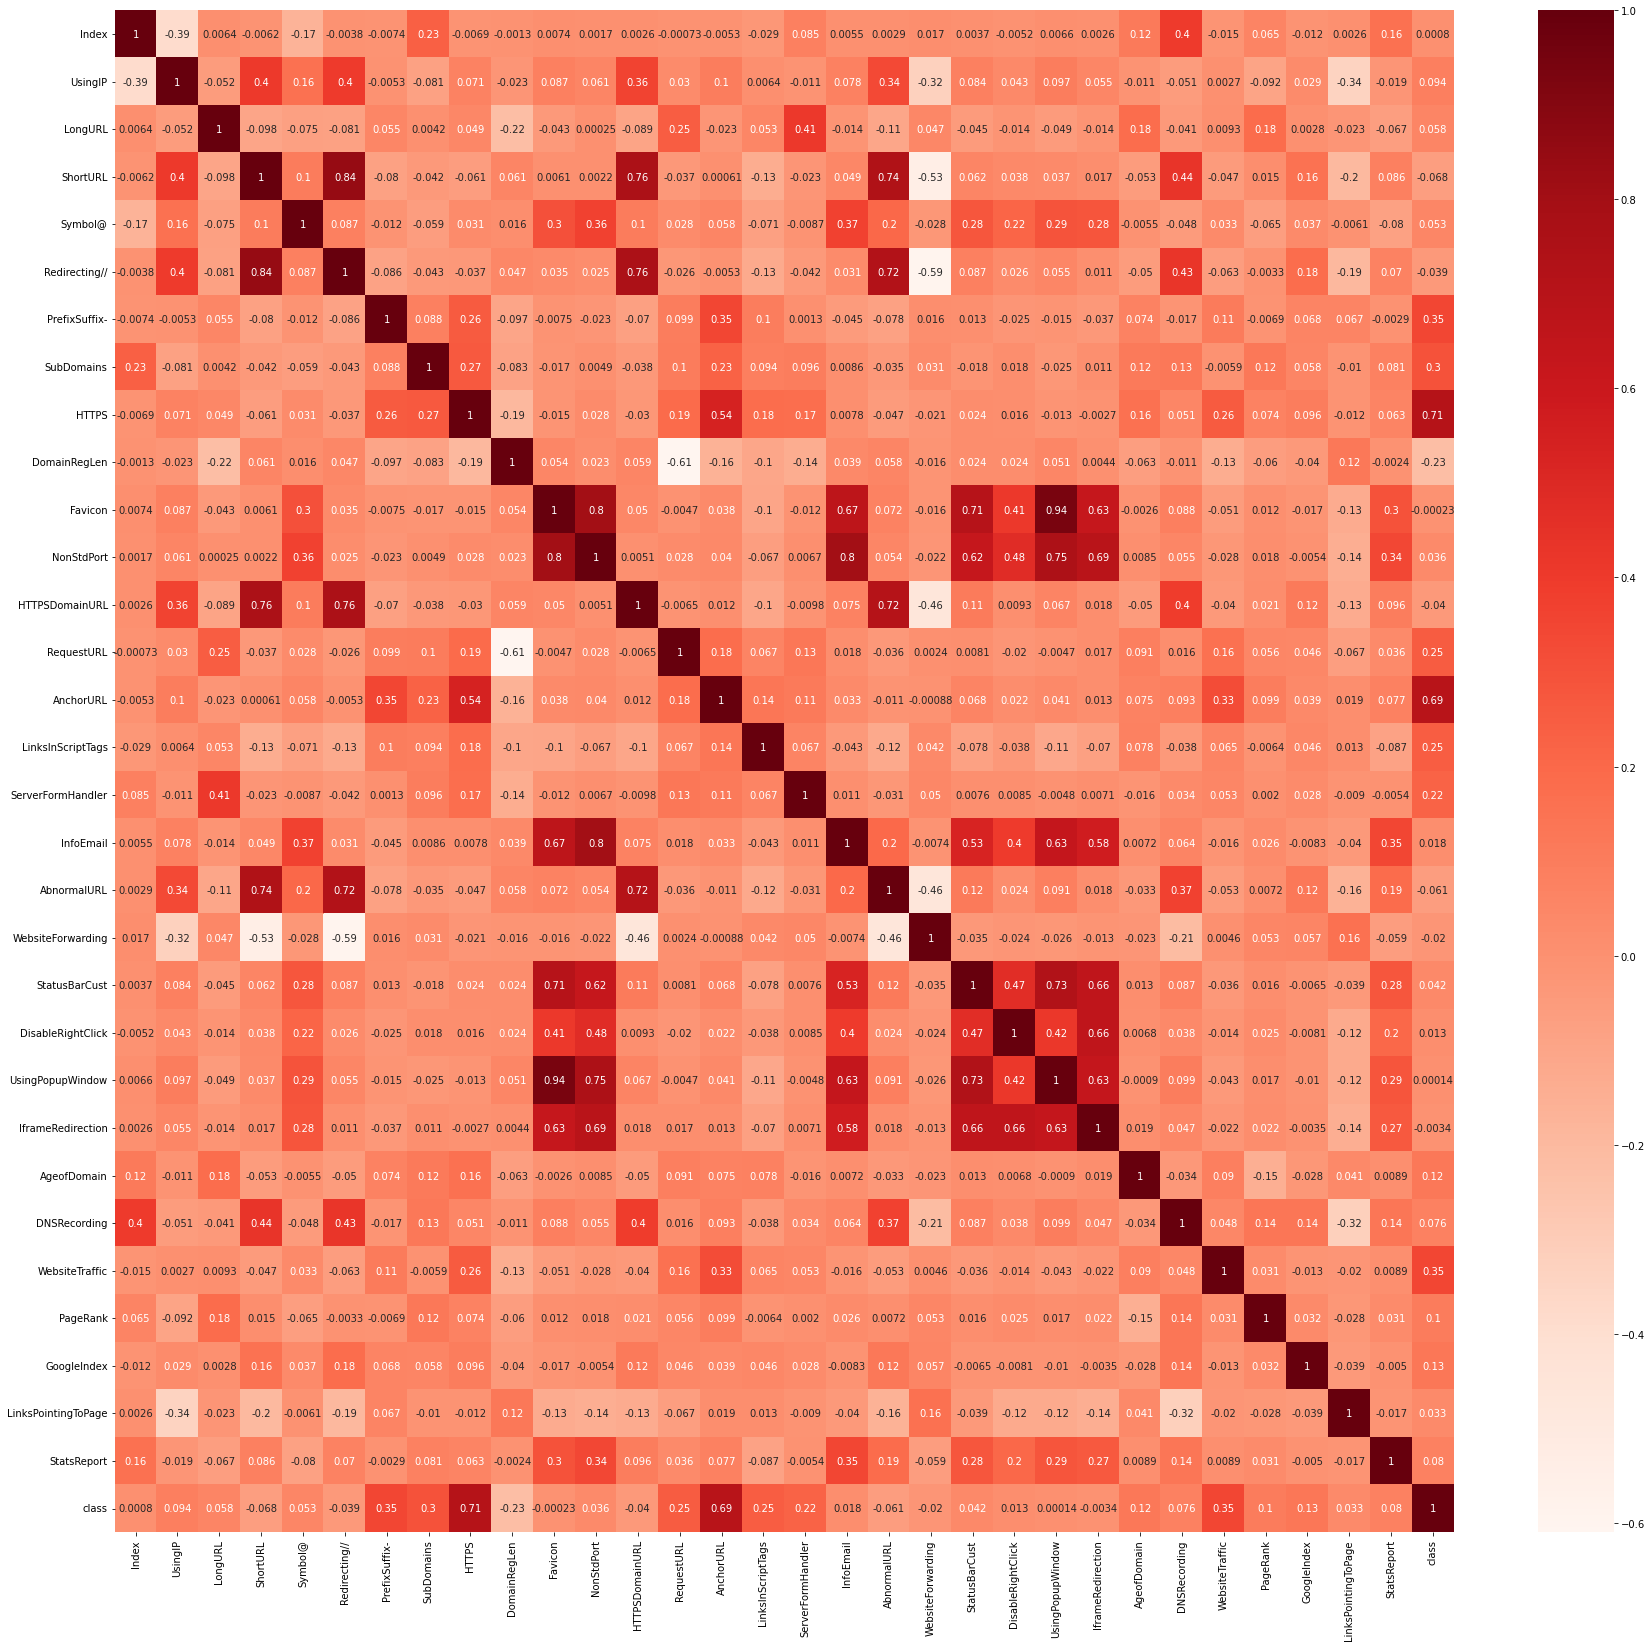

In [ ]:
# feature selection
# using Pearson Correlation
plt.figure(figsize=(30,28))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["class"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

PrefixSuffix-        0.348588
SubDomains           0.298231
HTTPS                0.714704
DomainRegLen         0.225879
RequestURL           0.253478
AnchorURL            0.692895
LinksInScriptTags    0.248415
ServerFormHandler    0.221380
WebsiteTraffic       0.346003
class                1.000000
Name: class, dtype: float64

In [ ]:
relevant_cols = relevant_features.keys().to_list()

In [ ]:
relevant_cols

['PrefixSuffix-',
 'SubDomains',
 'HTTPS',
 'DomainRegLen',
 'RequestURL',
 'AnchorURL',
 'LinksInScriptTags',
 'ServerFormHandler',
 'WebsiteTraffic',
 'class']

In [ ]:
prepared_df = df[relevant_cols]

In [ ]:
prepared_df.shape

(11054, 10)

In [ ]:
# Filter 10 colums for final tests
df_final_tests = prepared_df[:10]
prepared_df = prepared_df[10:]

In [ ]:
prepared_df.head()

,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,RequestURL,AnchorURL,LinksInScriptTags,ServerFormHandler,WebsiteTraffic,class
10,-1,1,-1,-1,1,-1,-1,-1,-1,-1
11,-1,0,0,1,-1,-1,1,-1,-1,-1
12,-1,0,-1,1,-1,-1,-1,-1,0,-1
13,1,-1,1,-1,1,0,1,1,1,1
14,-1,0,0,1,-1,-1,0,-1,-1,-1


In [ ]:
Y = prepared_df['class']
X = prepared_df.drop(columns='class')

In [ ]:
# split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8835, 9)
(2209, 9)
(8835,)
(2209,)


# Models & optimization

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

K-Nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
model_knn = knn.fit(X_train,Y_train)

In [ ]:
knn_predict = model_knn.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, knn_predict))

Accuracy: 0.9275690357627886


In [ ]:
print(metrics.classification_report(knn_predict, Y_test))

              precision    recall  f1-score   support

          -1       0.91      0.92      0.92       961
           1       0.94      0.93      0.94      1248

    accuracy                           0.93      2209
   macro avg       0.93      0.93      0.93      2209
weighted avg       0.93      0.93      0.93      2209



Decision Tree Classifier

In [ ]:

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9406971480307832


Optimizing Decision Tree Performance

In [ ]:
# Defining criterion attribute selection measure for he Gini index (Set it to 'gini')
# Define max-depth to 50 to expand the leaves | Avoid underfitting
clf = DecisionTreeClassifier(criterion="gini", max_depth=50)

clf = clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9420552286102308


In [ ]:
print(metrics.classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

          -1       0.92      0.95      0.93       941
           1       0.96      0.94      0.95      1268

    accuracy                           0.94      2209
   macro avg       0.94      0.94      0.94      2209
weighted avg       0.94      0.94      0.94      2209



# Save Model

In [ ]:
# pickle.dump(clf, open('/content/drive/MyDrive/School [ALU]/Computer Science/Y_4/TERM2/Data Mining/Summative/saved_model/model.pkl', 'wb'))

In [ ]:
# loaded_model = pickle.load(open('/content/drive/MyDrive/School [ALU]/Computer Science/Y_4/TERM2/Data Mining/Summative/saved_model/model.pkl', 'rb'))